<a href="https://colab.research.google.com/github/manjaria007/classifierss/blob/master/LogisticRegression(MNIST-digit).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Using MNIST Dataset

In [2]:
# Import nescessary libraries
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


# Data Processing

In [3]:
# Select Data

trainDataPath = "/content/drive/MyDrive/sample_data/mnist_train.csv"
testDataPath = "/content/drive/MyDrive/sample_data/mnist_test.csv"

In [4]:
# Import MNIST train and test sets
try:
    train = pd.read_csv(trainDataPath)
    test = pd.read_csv(testDataPath)
except FileNotFoundError: 
    print("File not found. Please download file mnist_train.csv and mnist_test.csv")


In [5]:
train = train.to_numpy()
test = test.to_numpy()

In [6]:
# digitLabel: The label associated with each image is encoded as an integer value between 0 and 9
# pixelVal: The pixel values of the 28x28=784 pixels of the image.

class MnistDL:
    def __init__(self, digitLabel, pixelVal):
        self.digitLabel = digitLabel.flatten()
        self.pixelVal = pixelVal


In [7]:
# Train and test from MnistDL class
train_data = MnistDL(train[0:,0:1], train[0:,1:785])
test_data = MnistDL(test[0:,0:1], test[0:,1:785])

# Labels: the first column of dataset, extracted by using data[0:,0:1] 
# Pixel values: the remaining 784 columns correspond to the pixel values of the 28x28=784 pixels of the image,
# extracted by using data[0:,1:785]    

# Visualizing Dataset

In [8]:
# Plot a image
def plot_image(data, row):
    plt.imshow(np.reshape(data[row], (28,28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % train_data.digitLabel[row], fontsize = 20)
    

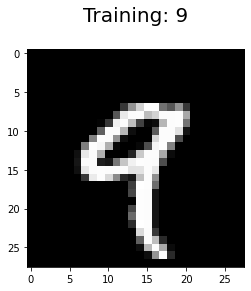

In [9]:
# Plotting the image in train data
plot_image(train_data.pixelVal, 3)

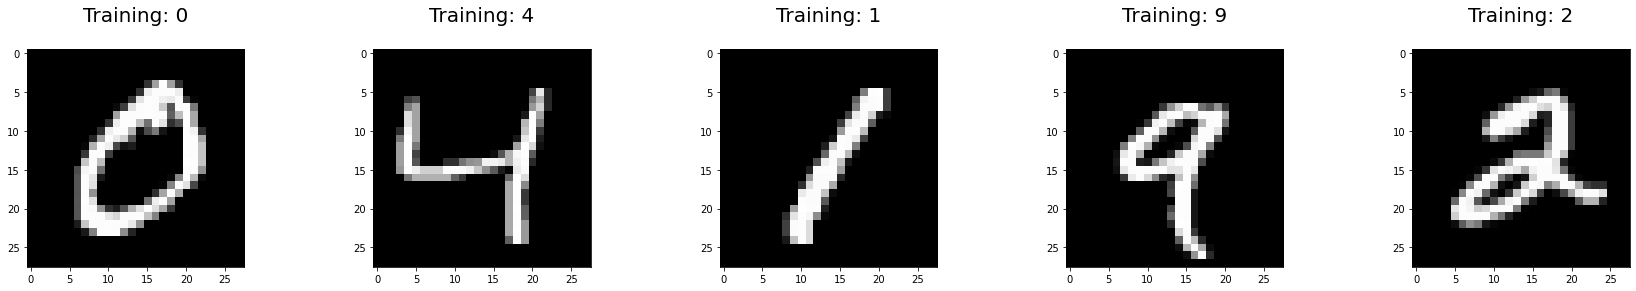

In [10]:
# Plotting multiple images
plt.figure(figsize=(30,4))
for i, (image, label) in enumerate(zip(train_data.pixelVal[0:5], train_data.digitLabel[0:5])):
    plt.subplot(1, 5, i + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

## Logistic Regression Model

In [11]:
# train and test sets
x_train, y_train, x_test, y_test = [train_data.pixelVal, 
                                    train_data.digitLabel, 
                                    test_data.pixelVal, 
                                    test_data.digitLabel]

In [12]:
lr = LogisticRegression(solver = 'lbfgs')

In [13]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
#Predict_proba to get probabilities from the dataset
prob = lr.predict_proba(x_test[1].reshape(1, -1))

In [16]:
prob

array([[2.16388046e-07, 9.84488798e-01, 9.08831414e-03, 1.37109531e-03,
        3.60420602e-05, 1.46218602e-04, 4.97176247e-04, 4.37974299e-04,
        3.74858623e-03, 1.85578237e-04]])

In [17]:
# Object to store model results 
class LR():
    def __init__(self, lr, confusion_matrix, accuracy):
        self.lr = lr
        self.confusion_matrix = confusion_matrix
        self.accuracy = accuracy

In [18]:
def lrModel(digit):
    # Check parameters
    if(digit < 0 or digit > 9 or type(digit) != int):
        print('Invalid digit value. Please re-enter integer digit value between 0 and 9.')
        return
    
    # Relabelling each response with a 1 if its value is equal to the given digit, and 0 otherwise. 
    train_label = np.empty([len(y_train)]).astype(int)
    for index, _ in enumerate(train_label):
        train_label[index] = 1 if y_train[index] == digit else 0 
    
    # same relabel for test data
    test_label = np.empty([len(y_test)]).astype(int)
    for index, _ in enumerate(test_label):
        test_label[index] = 1 if y_test[index] == digit else 0 

    # Build logistic model
    lr.fit(x_train, train_label)
    
    # predict
    predictions = lr.predict(x_test)
    
    # confusion matrix for the model
    confMatrix = metrics.confusion_matrix(test_label, predictions)
        
    # score method to get accuracy of model
    score = lr.score(x_test, test_label)
    
    return LR(lr, confMatrix, score)

In [26]:
predictions = lr.predict(x_test)

# Calculate Probability of an predicting image 

In [19]:
def probcal(digit, predictValue):
    lr = lrModel(digit).lr
    print(lr.predict_proba(predictValue.reshape(1, -1)))
    prob = lr.predict_proba(predictValue.reshape(1, -1))[0][1]

    return prob

In [21]:
# softmax function to transform 10 probabilities into a probability distribution over the ten digits
def softmax(predictValue):
    probabilities = np.empty(10)
    for i in range(10):
        probabilities[i] = probcal(i, predictValue)
    
    # Applying softmax to create a probability distribution
    e_z = np.exp(probabilities)
    e_z = e_z/e_z.sum()
    
    print(probabilities)
    # Show the maximum probability from softmax calculation, indicating predicted digit
    smprob = max(e_z)
    predictedDigit = e_z.tolist().index(smprob)
    print(e_z)
    # Print results
    print(f'Predicted digit: {predictedDigit}') 
    print(f'Prob.: {probabilities[predictedDigit]}')
    print(f'Prob. from Softmax function: {smprob}')

In [22]:
# Calculate probability of the third image in test set
softmax(x_test[2])

[[9.66013751e-04 9.99033986e-01]]
[[1.00000000e+00 1.44444541e-12]]
[[9.99634384e-01 3.65616425e-04]]
[[9.99884184e-01 1.15816010e-04]]
[[9.99999862e-01 1.38350753e-07]]
[[9.99802314e-01 1.97685930e-04]]
[[0.99704352 0.00295648]]
[[9.99963689e-01 3.63111245e-05]]
[[9.99809464e-01 1.90536164e-04]]
[[9.99950483e-01 4.95168023e-05]]
[9.99033986e-01 1.44444541e-12 3.65616425e-04 1.15816010e-04
 1.38350753e-07 1.97685930e-04 2.95647970e-03 3.63111245e-05
 1.90536164e-04 4.95168023e-05]
[0.23171979 0.08532734 0.08535854 0.08533722 0.08532735 0.0853442
 0.08557998 0.08533043 0.08534359 0.08533156]
Predicted digit: 0
Prob.: 0.9990339862486033
Prob. from Softmax function: 0.23171979187014757


# confusion matrix for each model

In [23]:
# Function showing confusion matrix and model accuracy of all models for digit (0-9)
def confusion_matrix():
    for digit in range(10): 
        model = lrModel(digit)
        print(f'Confusion Matrix of model for digit {digit}:') 
        print(model.confusion_matrix)
        print(f'Accuracy: {model.accuracy}')
        print('------------------------------------------------')

In [24]:
confusion_matrix()

Confusion Matrix of model for digit 0:
[[8972   47]
 [  30  950]]
Accuracy: 0.9922992299229924
------------------------------------------------
Confusion Matrix of model for digit 1:
[[8824   40]
 [  27 1108]]
Accuracy: 0.9932993299329933
------------------------------------------------
Confusion Matrix of model for digit 2:
[[8913   54]
 [ 144  888]]
Accuracy: 0.9801980198019802
------------------------------------------------
Confusion Matrix of model for digit 3:
[[8887  102]
 [ 138  872]]
Accuracy: 0.975997599759976
------------------------------------------------
Confusion Matrix of model for digit 4:
[[8939   78]
 [  90  892]]
Accuracy: 0.9831983198319832
------------------------------------------------
Confusion Matrix of model for digit 5:
[[9033   74]
 [ 147  745]]
Accuracy: 0.9778977897789779
------------------------------------------------
Confusion Matrix of model for digit 6:
[[8972   69]
 [  82  876]]
Accuracy: 0.9848984898489849
------------------------------------------